## In class Exercise 5
The purpose of this exercise is to practice different ML algorithms for text classification, text clustering, and model evaluation.

Hint: You might want to use the code demos from previous lectures, where suitable.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due tonight December 6th, 2023 at 11:59 PM.
**Late submissions cannot be considered.**

### Question 1.

The purpose of this question is to practice different machine learning algorithms for text classification, along with performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training.

The dataset (see Canvas) contains two files train data and test data for sentiment analysis in IMDB review, and it has two categories: 1 represents positive and 0 represents negative.

You need to split the training data into training and validation data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model needs to be evaluated on the test data.

Algorithms:
1. MultinominalNB (2 points)
2. SVM (2 points)
3. KNN (2 points)
4. Decision tree (2 points)
5. Random Forest (2 points)
6. XGBoost (2 points)

Evaluation measurement:
1. Accuracy (2 points)
2. Recall (2 points)
3. Precison (2 points)
4. F-1 score (2 points)

In [1]:
# Write your code here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
# Creating empty lists at first to hold labels and messages
labels = []
texts = []

# Creating empty lists to contain labels and texts and performing initialization on them
with open("C://Users//somas//Downloads//exercise05_datacollection//exercise09_datacollection//stsa-train.txt", "r") as file:
    for line in file:
        # Separation of the line into its label and text components
        label, text = line.split(' ', 1)
        
        # Adding the label as well as the text to the appropriate lists.
        labels.append(int(label))
        texts.append(text.strip())  # Elimination of leading and trailing whitespaces in the expression

# Constructing a DataFrame out of the lists
df = pd.DataFrame({'Label': labels, 'Text': texts})

# viewing head of dataframe
df.head()


,Label,Text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [2]:
df["Label"].value_counts()

1    3610
0    3310
Name: Label, dtype: int64

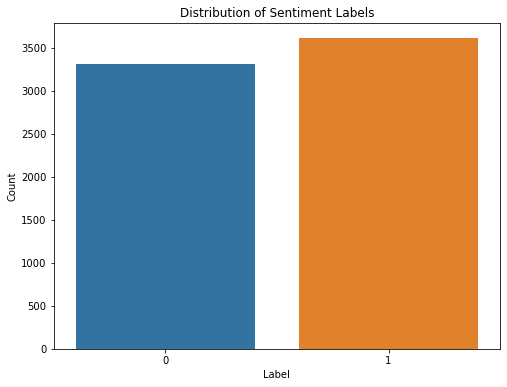

In [3]:
# Creating a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x="Label", data=df)

# Adding labels and title
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Sentiment Labels")
plt.show()


In [4]:
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [5]:
import string
# Function to preprocess and clean text
def text_preprocessing(text):
    # Remove punctuation and special characters
    text = ''.join([character for character in text if character not in string.punctuation])
    
    # Remove numbers from text
    text = ''.join([character for character in text if not character.isdigit()])
    
    # Tokenize the text
    words = nltk.word_tokenize(text)
    
    # Remove stopwords from text
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Lowercase all words
    words = [w.lower() for w in words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Joining the words back into a cleaned sentence
    cleaned_user_text = ' '.join(words)
    
    return cleaned_user_text



In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\somas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
import os
print(os.getcwd())

C:\Users\somas\Downloads


In [14]:
import os

nltk_data_path = "C://Users//somas//Downloads"
wordnet_path = os.path.join(nltk_data_path, "corpora/wordnet")

os.makedirs(wordnet_path, exist_ok=True)

In [16]:
df1 = df[["Label","Text"]]
df1.head()

,Label,Text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [18]:
corpus = df1['Text'].tolist()
corpus[1:6]

['apparently reassembled from the cutting-room floor of any given daytime soap .',
 "they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes .",
 'this is a visually stunning rumination on love , memory , history and the war between art and commerce .',
 "jonathan parker 's bartleby should have been the be-all-end-all of the modern-office anomie films .",
 'campanella gets the tone just right -- funny in the middle of sad in the middle of hopeful .']

In [19]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer

TfidfVectorizer()

In [20]:
# Transforming the text data into numerical features
X = tfidf_vectorizer.fit_transform(corpus)

# Target  column
y = df1['Label']
# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# Generating instances of each of the classifiers
multinominalNB_classifier = MultinomialNB()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()
xgboost_classifier = XGBClassifier()

In [21]:
# Generating a dictionary of classifiers
classifiers = {
    "MultinomialNB": multinominalNB_classifier,
    "SVM": svm_classifier,
    "KNN": knn_classifier,
    "Decision Tree": decision_tree_classifier,
    "Random Forest": random_forest_classifier,
    "XGBoost": xgboost_classifier,
}
import numpy as np
# Generating a dictionary to store results
results_dictionary = {}

# Setting the CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# by iteratively cycling over all of the classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nTraining & evaluating {classifier_name} model")
    
    # CV the classifier
    scores = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    average_accuracy = np.mean(scores)
    
    # Fitting the classifier on the X_train, y_train
    classifier.fit(X_train, y_train)
    
    # Making predictions on the validation data(X_valid)
    y_pred = classifier.predict(X_valid)
    
    # Calculating evaluation metrics on the validation data
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    
    # Storing the findings in the dictionary for future reference
    results_dictionary[classifier_name] = {
        'Average Accuracy (CV)': average_accuracy,
        'Accuracy (Validation data)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


Training & evaluating MultinomialNB model

Training & evaluating SVM model

Training & evaluating KNN model

Training & evaluating Decision Tree model

Training & evaluating Random Forest model

Training & evaluating XGBoost model


In [22]:
results_dictionary

{'MultinomialNB': {'Average Accuracy (CV)': 0.7792608091081792,
  'Accuracy (Validation data)': 0.7969653179190751,
  'Precision': 0.7571428571428571,
  'Recall': 0.8920056100981767,
  'F1 Score': 0.8190598840952994},
 'SVM': {'Average Accuracy (CV)': 0.7761847095919207,
  'Accuracy (Validation data)': 0.7976878612716763,
  'Precision': 0.7730138713745272,
  'Recall': 0.8597475455820477,
  'F1 Score': 0.8140770252324037},
 'KNN': {'Average Accuracy (CV)': 0.7133303085891853,
  'Accuracy (Validation data)': 0.7290462427745664,
  'Precision': 0.7150127226463104,
  'Recall': 0.788218793828892,
  'F1 Score': 0.7498332221480987},
 'Decision Tree': {'Average Accuracy (CV)': 0.6051184546386301,
  'Accuracy (Validation data)': 0.6192196531791907,
  'Precision': 0.6260162601626016,
  'Recall': 0.6479663394109397,
  'F1 Score': 0.6368022053756031},
 'Random Forest': {'Average Accuracy (CV)': 0.7059204470528329,
  'Accuracy (Validation data)': 0.7341040462427746,
  'Precision': 0.7095990279465371

In [23]:
# output
for classifier_name, metrics in results_dictionary.items():
    print(f"Evaluation measurement for the {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")

Evaluation measurement for the MultinomialNB:
Average Accuracy (CV): 0.7792608091081792
Accuracy (Validation data): 0.7969653179190751
Precision: 0.7571428571428571
Recall: 0.8920056100981767
F1 Score: 0.8190598840952994


Evaluation measurement for the SVM:
Average Accuracy (CV): 0.7761847095919207
Accuracy (Validation data): 0.7976878612716763
Precision: 0.7730138713745272
Recall: 0.8597475455820477
F1 Score: 0.8140770252324037


Evaluation measurement for the KNN:
Average Accuracy (CV): 0.7133303085891853
Accuracy (Validation data): 0.7290462427745664
Precision: 0.7150127226463104
Recall: 0.788218793828892
F1 Score: 0.7498332221480987


Evaluation measurement for the Decision Tree:
Average Accuracy (CV): 0.6051184546386301
Accuracy (Validation data): 0.6192196531791907
Precision: 0.6260162601626016
Recall: 0.6479663394109397
F1 Score: 0.6368022053756031


Evaluation measurement for the Random Forest:
Average Accuracy (CV): 0.7059204470528329
Accuracy (Validation data): 0.73410404624

# Predictions on test data

In [24]:
#Test Data
# Creating empty lists to contain labels and texts and performing initialization on them
with open("C://Users//somas//Downloads//exercise05_datacollection//exercise09_datacollection//stsa-test.txt", "r") as file:
    for line in file:
        # Separation of the line into its label and text components
        label, text = line.split(' ', 1)
        
        # Adding the label as well as the text to the appropriate lists.
        labels.append(int(label))
        texts.append(text.strip())  # Elimination of leading and trailing whitespaces in the expression

# Constructing a DataFrame out of the lists
test_df = pd.DataFrame({'Label': labels, 'Text': texts})

# viewing head of dataframe
test_df.head()

,Label,Text
0,1,"a stirring , funny and finally transporting re..."
1,0,apparently reassembled from the cutting-room f...
2,0,they presume their audience wo n't sit still f...
3,1,this is a visually stunning rumination on love...
4,1,jonathan parker 's bartleby should have been t...


In [27]:
corpus = test_df['Text'].tolist()
corpus[1:6]

['apparently reassembled from the cutting-room floor of any given daytime soap .',
 "they presume their audience wo n't sit still for a sociology lesson , however entertainingly presented , so they trot out the conventional science-fiction elements of bug-eyed monsters and futuristic women in skimpy clothes .",
 'this is a visually stunning rumination on love , memory , history and the war between art and commerce .',
 "jonathan parker 's bartleby should have been the be-all-end-all of the modern-office anomie films .",
 'campanella gets the tone just right -- funny in the middle of sad in the middle of hopeful .']

In [28]:
# Generating a dictionary to store results
results_dictionary = {}

# Setting the CV
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# by iteratively cycling over all of the classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nTraining & evaluating {classifier_name} model")
    
    # CV the classifier
    scores = cross_val_score(classifier, X_train, y_train, cv=kf, scoring='accuracy')
    average_accuracy = np.mean(scores)
    
    # Fitting the classifier on the X_train, y_train
    classifier.fit(X_train, y_train)
    
    # Making predictions on the validation data(X_valid)
    y_pred = classifier.predict(X_valid)
    
    # Calculating evaluation metrics on the validation data
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    
    # Storing the findings in the dictionary for future reference
    results_dictionary[classifier_name] = {
        'Average Accuracy (CV)': average_accuracy,
        'Accuracy (Validation data)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }


Training & evaluating MultinomialNB model

Training & evaluating SVM model

Training & evaluating KNN model

Training & evaluating Decision Tree model

Training & evaluating Random Forest model

Training & evaluating XGBoost model


In [29]:
# output
for classifier_name, metrics in results_dictionary.items():
    print(f"Evaluation measurement for the {classifier_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("\n")


Evaluation measurement for the MultinomialNB:
Average Accuracy (CV): 0.7792608091081792
Accuracy (Validation data): 0.7969653179190751
Precision: 0.7571428571428571
Recall: 0.8920056100981767
F1 Score: 0.8190598840952994


Evaluation measurement for the SVM:
Average Accuracy (CV): 0.7761847095919207
Accuracy (Validation data): 0.7976878612716763
Precision: 0.7730138713745272
Recall: 0.8597475455820477
F1 Score: 0.8140770252324037


Evaluation measurement for the KNN:
Average Accuracy (CV): 0.7133303085891853
Accuracy (Validation data): 0.7290462427745664
Precision: 0.7150127226463104
Recall: 0.788218793828892
F1 Score: 0.7498332221480987


Evaluation measurement for the Decision Tree:
Average Accuracy (CV): 0.6052976544088365
Accuracy (Validation data): 0.6192196531791907
Precision: 0.6246648793565683
Recall: 0.6535764375876578
F1 Score: 0.6387936943111721


Evaluation measurement for the Random Forest:
Average Accuracy (CV): 0.7075414052656661
Accuracy (Validation data): 0.72326589595

### Question 2.

The purpose of the question is to practice different machine learning algorithms for text clustering.

Please downlad the dataset by using the following link: https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones

Apply the listed clustering methods to the dataset:
1. K-means (4 points)
2. DBSCAN (4 points)
3. Hierarchical clustering (4 points)
4. Word2Vec (4 points)
5. BERT (4 points)

In [49]:
#Write your code here.


#Write your code here.
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
df2 = pd.read_csv(r"C:\Users\somas\Downloads\Amazon_Unlocked_Mobile\Amazon_Unlocked_Mobile.csv")
df2.head()


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [51]:
df2.shape

(413840, 6)

In [50]:
#You can write you answer here. (No code needed)

df2.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [55]:
df2 = df2.dropna(subset=['Reviews','Review Votes'])

In [57]:
mode_value = df2['Brand Name'].mode()[0]
df2['Brand Name'] = df2['Brand Name'].fillna(mode_value)

In [58]:
mean_=df2['Price'].mean()
df2['Price']=df2['Price'].fillna(mean_)

In [59]:
df2.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [60]:
df2["Reviews"].shape

(401482,)

In [70]:
df2 = df2.iloc[0:10000, :]

In [71]:
# Function to preprocess and clean review
def review_preprocessing(review):
    # Remove punctuation and special characters
    review = ''.join([character for character in review if character not in string.punctuation])
    
    # Remove numbers
    review = ''.join([character for character in review if not character.isdigit()])
    
    # Tokenize the review
    words = nltk.word_tokenize(review)
    
    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Lowercase all words
    words = [w.lower() for w in words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)
    
    return cleaned_user_reviews


In [72]:
# Vectorize the text using TfidfVectorizer
vectorizing = TfidfVectorizer(stop_words='english', max_features=5000)
rev_vector = vectorizing.fit_transform(df2['Reviews'])

In [74]:
# Standardize the vectorized features
scaler = StandardScaler()
scaled_rev = scaler.fit_transform(rev_vector.toarray())
k_means = KMeans(n_clusters=3, random_state=42)
df2['KMeans_Clusters'] = k_means.fit_predict(scaled_rev)
df2

C:\Users\somas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-74-24481b8c8f6c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['KMeans_Clusters'] = k_means.fit_predict(scaled_rev)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,KMeans_Clusters
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
...,...,...,...,...,...,...,...
10331,Apple iPhone 4 A1332 16GB White (GSM Unlocked),Samsung,188.45,5,Good product,0.0,1
10332,Apple iPhone 4 A1332 16GB White (GSM Unlocked),Samsung,188.45,5,The cellphone was incorrectly unlocked and i`v...,0.0,1
10333,Apple iPhone 4 A1332 32GB Black (GSM Unlocked),Apple,75.00,5,It was what I was looking for in a Phone thank...,0.0,1
10334,Apple iPhone 4 A1332 32GB Black (GSM Unlocked),Apple,75.00,5,Phone was in near perfect shape and it came wi...,0.0,1


In [75]:
# Applying the DBSCAN clustering
dbscan_clustering = DBSCAN(eps=0.5, min_samples=5)
df2['DBSCAN_Clusters'] = dbscan_clustering.fit_predict(scaled_rev)


<ipython-input-75-b2467f241db2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DBSCAN_Clusters'] = dbscan_clustering.fit_predict(scaled_rev)


In [76]:
 #Apply Hierarchical clustering
hierarchical_clustering= AgglomerativeClustering(n_clusters=3)
df2['Hierarchical_Clusters'] = hierarchical_clustering.fit_predict(scaled_rev)


<ipython-input-76-46aea21c5a18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hierarchical_Clusters'] = hierarchical_clustering.fit_predict(scaled_rev)


In [77]:
df2.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,KMeans_Clusters,DBSCAN_Clusters,Hierarchical_Clusters
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1,-1,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1,-1,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1,-1,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1,-1,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1,-1,0


In [78]:
df3=df2[['KMeans_Clusters','DBSCAN_Clusters','Hierarchical_Clusters']]
df3.head()

,KMeans_Clusters,DBSCAN_Clusters,Hierarchical_Clusters
0,1,-1,0
1,1,-1,0
2,1,-1,0
3,1,-1,0
4,1,-1,0


C:\Users\somas\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\somas\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\somas\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\somas\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


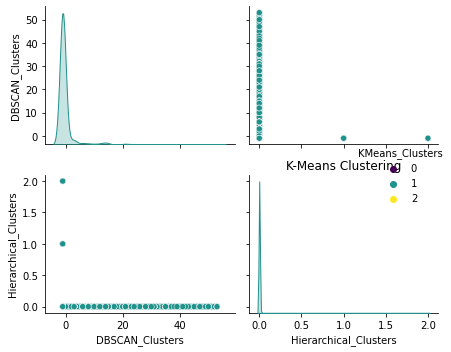

In [79]:
# Visualize the clusters
sns.pairplot(df3, hue='KMeans_Clusters', palette='viridis', diag_kind='kde')
plt.title('K-Means Clustering')
plt.tight_layout()
plt.show()

K-means
DBSCAN clustering
Hierarchical clustering results

In [80]:

from sklearn.metrics import silhouette_score


silhouette_kmeans_clustering = silhouette_score(scaled_rev, df3['KMeans_Clusters'])
print(f"Silhouette Score for the K-means Clustering: {silhouette_kmeans_clustering}")
print("\n")

silhouette_dbscan_clustering = silhouette_score(scaled_rev, df3['DBSCAN_Clusters'])
print(f"Silhouette Score for the DBSCAN Clustering: {silhouette_dbscan_clustering}")
print("\n")

silhouette_hierarchical_clustering = silhouette_score(scaled_rev, df3['Hierarchical_Clusters'])
print(f"Silhouette Score for the Hierarchical Clustering: {silhouette_hierarchical_clustering}")
print("\n")

Silhouette Score for the K-means Clustering: 0.2400903848559924


Silhouette Score for the DBSCAN Clustering: -0.21973914381613632


Silhouette Score for the Hierarchical Clustering: 0.5466364689795501




# word2vec clustering

In [81]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [83]:
# Tokenize the cleaned reviews into words
tokenized_rev = df2['Reviews'].apply(lambda x: x.split())
tokenized_rev

0        [I, feel, so, LUCKY, to, have, found, this, us...
1        [nice, phone,, nice, up, grade, from, my, pant...
2                                          [Very, pleased]
3        [It, works, good, but, it, goes, slow, sometim...
4        [Great, phone, to, replace, my, lost, phone., ...
                               ...                        
10331                                      [Good, product]
10332    [The, cellphone, was, incorrectly, unlocked, a...
10333    [It, was, what, I, was, looking, for, in, a, P...
10334    [Phone, was, in, near, perfect, shape, and, it...
10335    [they, arived, in, time, in, APO, adress-Afgha...
Name: Reviews, Length: 10000, dtype: object

In [84]:
# Training the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_rev, vector_size=100, window=5, min_count=1, workers=4)
# Get word vectors
word_vectors = word2vec_model.wv

In [85]:
# Clustering the word vectors using KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(word_vectors.vectors)


C:\Users\somas\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
# Dimensionality reduction for the purpose of visualisation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors.vectors)

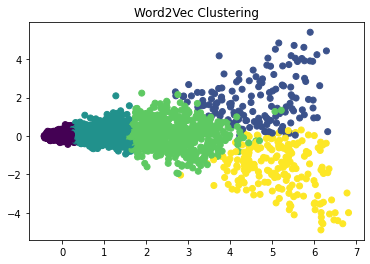

In [87]:
# Visualizing the  clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.title('Word2Vec Clustering')
plt.show()


In [88]:
# Evaluating the  Silhouette Score for the Word2Vec model
from sklearn.metrics import silhouette_score
silhouette_average = silhouette_score(word_vectors.vectors, clusters)
print(f"Silhouette Score for the Word2Vec model : {silhouette_average}")

Silhouette Score for the Word2Vec model : 0.7203503847122192


# Bert clustering

In [89]:
from transformers import BertTokenizer, BertModel
import torch

In [92]:
pip install --upgrade torch

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\somas\\anaconda3\\Lib\\site-packages\\~.rch\\lib\\asmjit.dll'
Consider using the `--user` option or check the permissions.


  Attempting uninstall: torch
    Found existing installation: torch 1.8.0
    Uninstalling torch-1.8.0:
      Successfully uninstalled torch-1.8.0


In [94]:
pip install --upgrade torch

In [93]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Tokenization and Embedding
tok_rev_bert = df2['Cleaned_Reviews'].apply(lambda x: tokenizer(x, return_tensors='pt', truncation=True, padding=True))
bert_embed = tok_rev_bert.apply(lambda x: model(**x).last_hidden_state.mean(dim=1).detach().numpy())

# Convert BERT embeddings to a matrix
bert_mat = np.array(bert_embed.tolist())

# Reshape the matrix if necessary
num_seq, seq_len, embedding_size = bert_mat.shape
reshape_bert_mat = bert_mat.reshape(num_seq, seq_len, embedding_size)

# Reshape the matrix by flattening the sequence dimension
flatten_bert_mat = bert_mat.reshape(-1, embedding_size)

# PCA for BERT embeddings
pca_bert = PCA(n_components=2)
pca_result_bert = pca_bert.fit_transform(flatten_bert_mat)

# KMeans clustering for BERT PCA embeddings
kmeans_bert = KMeans(n_clusters=5, random_state=42)
clusters_bert = kmeans_bert.fit_predict(pca_result_bert)

# Visualize BERT clusters
plt.scatter(pca_result_bert[:, 0], pca_result_bert[:, 1], c=clusters_bert, cmap='viridis')
plt.title('BERT Clustering')
plt.show()

AttributeError: module 'torch' has no attribute 'frombuffer'

In [91]:
# Evaluating the  Silhouette Score for the BERT Clustering model
silhouette_avg_bert = silhouette_score(flatten_bert_mat, clusters_bert)

print(f"Silhouette Score for the BERT Clustering model: {silhouette_avg_bert:.3f}")

NameError: name 'flatten_bert_mat' is not defined